Import Packages

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import numpy as np
import operator

Files for Gephi

In [2]:
df = pd.read_csv(r'./dataset.csv')

df2 = df[["track_id","writers","track_name","track_pos"]]
df2_dict = df2.to_dict(orient='records')

d = []

for f in df2_dict:
    d.extend(f["writers"].split("-"))

set_d = set([a.strip() for a in d])
dict_vett_writers = []
new_dict_vect_writers = []
support = []
support2 = ""

for writer in set_d:
    for d in df2_dict:
        if writer in [a.strip() for a in d["writers"].split("-")]:
            support.append({"name":d["track_name"],"pos":d["track_pos"]})
            support2 += d["track_name"]+" - "+str(d["track_pos"])+","
    dict_vett_writers.append({"writer":writer,"tracks":support})
    new_dict_vect_writers.append({"writer":writer,"tracks":support2[:-1].split(",")})
    support = []
list_edges = []
l_e_new = []
list_weights = []

for dic in dict_vett_writers:
    for dic2 in dict_vett_writers:
        for song in dic["tracks"]:
            if song in dic2["tracks"] and dic["writer"] != dic2["writer"]:
                if {"source":dic["writer"],"target":dic2["writer"]} in list_edges:
                    index = list_edges.index({"source":dic["writer"],"target":dic2["writer"]})
                    list_weights[index] += (10-song["pos"])
                else:
                    common_tracks =[]
                    list_edges.append({"source":dic["writer"],"target":dic2["writer"]})
                    for t1 in dic["tracks"]:
                        if t1 in dic2["tracks"]:
                            common_tracks.append(t1)
                    l_e_new.append({"source":dic["writer"],"target":dic2["writer"],"tracks":common_tracks})
                    list_weights.append(1 + (10-song["pos"]))

for weight in list_edges:
    a = weight["source"]
    b = weight["target"]
    index = list_edges.index(weight)
    try:
        list_edges.remove({"source":b,"target":a})
        list_weights.remove(list_weights[index])
    except:
        pass

lista =list(set([str(a["writer"]).strip() for a in dict_vett_writers]))
print(True if ("M. Vicino") in lista else False)
'''for w in lista:
    if w not in [b["source"] for b in list_edges]:
        lista.remove(w)'''

True


'for w in lista:\n    if w not in [b["source"] for b in list_edges]:\n        lista.remove(w)'

In [3]:
#top songwriters per numero di canzoni
v_singers = ['D. Pace','F. Migliacci','M. Panzeri','Mogol','A. Cogliati']
tabella = []
for singer in v_singers:
    val_singer = 0
    val_placed = 0
    for i , row in df2.iterrows():
        if singer in [a.strip() for a in row["writers"].split("-")] and row["track_pos"] <= 1:
            val_singer += 1
        if singer in [a.strip() for a in row["writers"].split("-")]:
            val_placed += 1
    tabella.append({"writer":singer,"val_top3":val_singer, "val_placed":val_placed})
    print("fine "+singer)

print(tabella)

fine D. Pace
fine F. Migliacci
fine M. Panzeri
fine Mogol
fine A. Cogliati
[{'writer': 'D. Pace', 'val_top3': 0, 'val_placed': 22}, {'writer': 'F. Migliacci', 'val_top3': 3, 'val_placed': 15}, {'writer': 'M. Panzeri', 'val_top3': 2, 'val_placed': 26}, {'writer': 'Mogol', 'val_top3': 4, 'val_placed': 16}, {'writer': 'A. Cogliati', 'val_top3': 2, 'val_placed': 11}]


In [4]:
v_singers = list(set([a["writer"] for a in dict_vett_writers]))
tabella = []
tabella2 = []
for singer in v_singers:
    val_singer = 0
    val_placed = 0
    for i , row in df2.iterrows():
        if singer in [a.strip() for a in row["writers"].split("-")] and row["track_pos"] <= 1:
            val_singer += 1
        if singer in [a.strip() for a in row["writers"].split("-")]:
            val_placed += 1
    if val_placed > 0 and val_singer > 1:
        tabella.append({"writer":singer,"val_agg":val_singer/val_placed , "val_top3":val_singer, "val_number":val_placed})
    #print("fine "+singer)

for singer in v_singers:
    val_singer = 0
    val_placed = 0
    for i , row in df2.iterrows():
        if singer in [a.strip() for a in row["writers"].split("-")] and row["track_pos"] <= 1:
            val_singer += 1
        if singer in [a.strip() for a in row["writers"].split("-")]:
            val_placed += 1
    tabella2.append({"writer":singer,"val_agg":val_singer/val_placed , "val_top3":val_singer, "val_number":val_placed})


print(tabella)
print(len(tabella))

[{'writer': 'M. Luca', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'F. Ilacqua', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'C. Minellono', 'val_agg': 0.25, 'val_top3': 2, 'val_number': 8}, {'writer': 'F. Gabbani', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'L. Albertelli', 'val_agg': 0.2, 'val_top3': 2, 'val_number': 10}, {'writer': 'F. Berlincioni', 'val_agg': 0.2222222222222222, 'val_top3': 2, 'val_number': 9}, {'writer': 'D. Verde', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'D. Farina', 'val_agg': 0.3333333333333333, 'val_top3': 2, 'val_number': 6}, {'writer': 'A. Testa', 'val_agg': 0.18181818181818182, 'val_top3': 2, 'val_number': 11}, {'writer': 'M. Fabrizio', 'val_agg': 0.2, 'val_top3': 3, 'val_number': 15}, {'writer': 'P. Palma', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'G. Bigazzi', 'val_agg': 0.2222222222222222, 'val_top3': 4, 'val_number': 18}, {'writer': 'G. Fiorelli', 'val_agg': 0.5, 'va

In [5]:
aaa = sorted(tabella, key=lambda k: float(k['val_agg']), reverse=True)
bbb = sorted(tabella2, key=lambda k: float(k['val_agg']), reverse=True)
v_singers = ['D. Pace','F. Migliacci','M. Panzeri','Mogol','A. Cogliati']
print(aaa)
for s in v_singers:
    try:
        print(s,"  ", [a['writer']for a in aaa].index(s))
    except:
        print(s,"  ", "not found")

print("------------------")
for s in v_singers:
    try:
        print(s,"  ", aaa[[a['writer']for a in aaa].index(s)]["val_number"])
    except:
        print(s,"  ", bbb[[b['writer']for b in bbb].index(s)]["val_number"])

[{'writer': 'M. Luca', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'F. Ilacqua', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'F. Gabbani', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'D. Verde', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'P. Palma', 'val_agg': 1.0, 'val_top3': 2, 'val_number': 2}, {'writer': 'E. Ramazzotti', 'val_agg': 0.6, 'val_top3': 3, 'val_number': 5}, {'writer': 'G. Fiorelli', 'val_agg': 0.5, 'val_top3': 2, 'val_number': 4}, {'writer': 'D. Modugno', 'val_agg': 0.5, 'val_top3': 4, 'val_number': 8}, {'writer': 'A. Salerno', 'val_agg': 0.5, 'val_top3': 4, 'val_number': 8}, {'writer': 'M. Ruccione', 'val_agg': 0.4, 'val_top3': 2, 'val_number': 5}, {'writer': 'L. Chiaravalli', 'val_agg': 0.4, 'val_top3': 2, 'val_number': 5}, {'writer': 'M. Masini', 'val_agg': 0.4, 'val_top3': 2, 'val_number': 5}, {'writer': 'M. Falagiani', 'val_agg': 0.4, 'val_top3': 2, 'val_number': 5}, {'writer': 'G. Dati', 'val_agg': 0

Creation of the files

In [6]:
writers = open("artisti.csv","w")
writers.write("Id,Label\n")
writers.write('\n'.join([str(a) + "," + str(a) for a in lista]))#('\n'.join(lista))
writers.close()

writersTracks = open("artisti_e_canzoni.csv","w")
writersTracks.write("Writer,Songs\n")
writersTracks.write('\n'.join([str(a["writer"]) + "," + str(a["tracks"]) for a in dict_vett_writers]))
writersTracks.close()

outfile = open("edges_list.csv","w")
outfile.write("Source,Target,Weight\n")
outfile.write('\n'.join([str(list_edges[i]["source"]) + "," + str(list_edges[i]["target"]) +","+ str(list_weights[i]) for i in range( len(list_edges))]))
outfile.close()

In [56]:
G = nx.Graph()
G.add_nodes_from(lista)
ebunch = [(list_edges[i]["source"],list_edges[i]["target"],{"weight":list_weights[i]}) for i in range( len(list_edges))]
G.add_edges_from(ebunch)

gMogol = nx.Graph()
gMogol.add_nodes_from(lista)
ebunchMogol = [(list_edges[i]["source"],list_edges[i]["target"],{"weight":list_weights[i]}) for i in range( len(list_edges)) if list_edges[i]["source"] == "Mogol" or list_edges[i]["target"] == "Mogol"]
gMogol.add_edges_from(ebunchMogol)
gMogol.remove_nodes_from(list(nx.isolates(gMogol)))

#degree centrality
print("degree centrality")
deg_centrality = nx.degree_centrality(G)
#nx.write_gexf(deg_centrality, "deg_cent.gexf")
print(deg_centrality,'\n')

'''import collections
from scipy.interpolate import make_interp_spline
#degree distribution
print("degree distribution")
print(nx.degree_histogram(G),'\n') #find probability
#plot degree distribution as a bar plot with a spline on top of the same data points
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
x = range(len(nx.degree_histogram(G)))
y = nx.degree_histogram(G)
xnew = np.linspace(min(x), max(x), 300)
spl = make_interp_spline(x, y, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.bar(deg, cnt, width=0.80, color="b")
plt.plot(xnew, power_smooth, color="red")   
plt.title("Degree Distribution Graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()'''


'''
plt.plot(xnew, power_smooth, color="red")
plt.show()'''



#pagerank
print("pagerank")
prank=nx.pagerank(G, weight="weight")
print(prank,'\n')

#average clustering coefficient
print("average clustering coefficient")
print(nx.average_clustering(G,weight="weight"),'\n')



#k-cliques
cliqueMatrix = []
cliqueMatrix.append([])
cliqueMatrix.append([])
for k in range(2,8):
    i = 0
    cliqueMatrix.append([])
    for clique in nx.find_cliques(G):
        if len(clique) == k:
            i += 1
            cliqueMatrix[k].append(clique)
        '''elif len(clique) > k:
            i += len(list(itertools.combinations(clique, k)))'''
    print(k,"-clique: ", i)
print('\n')

#clique edges experimental
def travel_list(l,k):
    for el in l:
        a = el.get(k,None)
        if a == None:
            continue
        else:
            return a

cliqueEdges= []
target = [{str(a["source"] + a["target"]):{"s":a["source"],"d":a["target"],"tracks":','.join([f["name"] + " - " + str(f["pos"]) for f in a["tracks"]])}} for a in l_e_new]
#print("target - ", target)
for i in range(len(cliqueMatrix[6])):
    cliqueEdges.append([])
    for node1 in cliqueMatrix[6][i]:
        s = []
        for node2 in cliqueMatrix[6][i]:
            t = travel_list(target,str(node1 + node2))
            if not t in s and t is not None:
                s.append(t)
        cliqueEdges.append(list(s))

result = [c for c in cliqueEdges ]#if len(c)>1]
#print("RES - ", result)

#############################
#find how many songs in every clique
cliqueSongs = []
for i in range(len(cliqueMatrix[6])):
    songs = []
    append_this = []
    for artist in cliqueMatrix[6][i]:
        for d in dict_vett_writers:
            if d["writer"] == artist:
                for song in d["tracks"]:
                    songs.append(song["name"] +" - " +str(song["pos"]))
        songs_set = set(songs)
        append_this = [[s,0] for s in songs_set]
        for song in songs:
            for j in range(len(append_this)):
                if song == append_this[j][0]:
                    append_this[j][1] += 1 #(song,append_this[j][1]+1)
        append_this = [a[0] for a in append_this if a[1] > 1]

    cliqueSongs.append("Clique number " + str(i) + " - " + str(append_this))
print("clique songs - ", cliqueSongs)

#############################
plt.rcParams['figure.figsize'] = [15, 10]
#closeness centrality
print("closeness centrality")
close_centrality = nx.closeness_centrality(G)
#print(nx.closeness_centrality(G),'\n')
print(close_centrality,'\n')
#sort closeness centrality



#betweenness centrality
print("betweenness centrality")
betw_centrality = nx.betweenness_centrality(G, normalized=True,weight="weight")
print(betw_centrality,'\n')

#local clustering coefficient
print("local clustering coefficient")
local_clustering = nx.clustering(G,weight="weight")
print(local_clustering,'\n')



#Degree Centrality, Degree Distibution, PageRank, Local Clustering Coefficient, N-cliques, Closeness, Betweenness

degree centrality
{'P. Marino': 0.0020325203252032522, 'L. Gonzalez Alea': 0.0020325203252032522, 'G. Belleno': 0.0020325203252032522, 'Kaballà': 0.0040650406504065045, 'F. S. Mangieri': 0.0, 'R. Sanna': 0.0010162601626016261, 'M. Luca': 0.0010162601626016261, 'D. Stefani': 0.0010162601626016261, 'C. Ori': 0.003048780487804878, 'F. Ilacqua': 0.0020325203252032522, 'G. Nenna': 0.003048780487804878, 'M. Z. Granieri': 0.0020325203252032522, 'G. Galgani': 0.0020325203252032522, 'P. Frescura': 0.0010162601626016261, 'R. Costa': 0.0020325203252032522, 'T. Cerasuolo': 0.005081300813008131, 'D. Bosio': 0.0020325203252032522, 'C. Allia': 0.0010162601626016261, 'Petaluma': 0.0040650406504065045, 'M. Rei': 0.0020325203252032522, 'D. Miglietta': 0.003048780487804878, 'C. Lo Mele': 0.005081300813008131, 'A. Santonocito': 0.0020325203252032522, 'A. Blescia': 0.0, 'G. Todrani': 0.008130081300813009, 'S. Fabiani': 0.003048780487804878, 'R. Cini': 0.0010162601626016261, 'A. Diodato': 0.0, 'L. Pellegrin

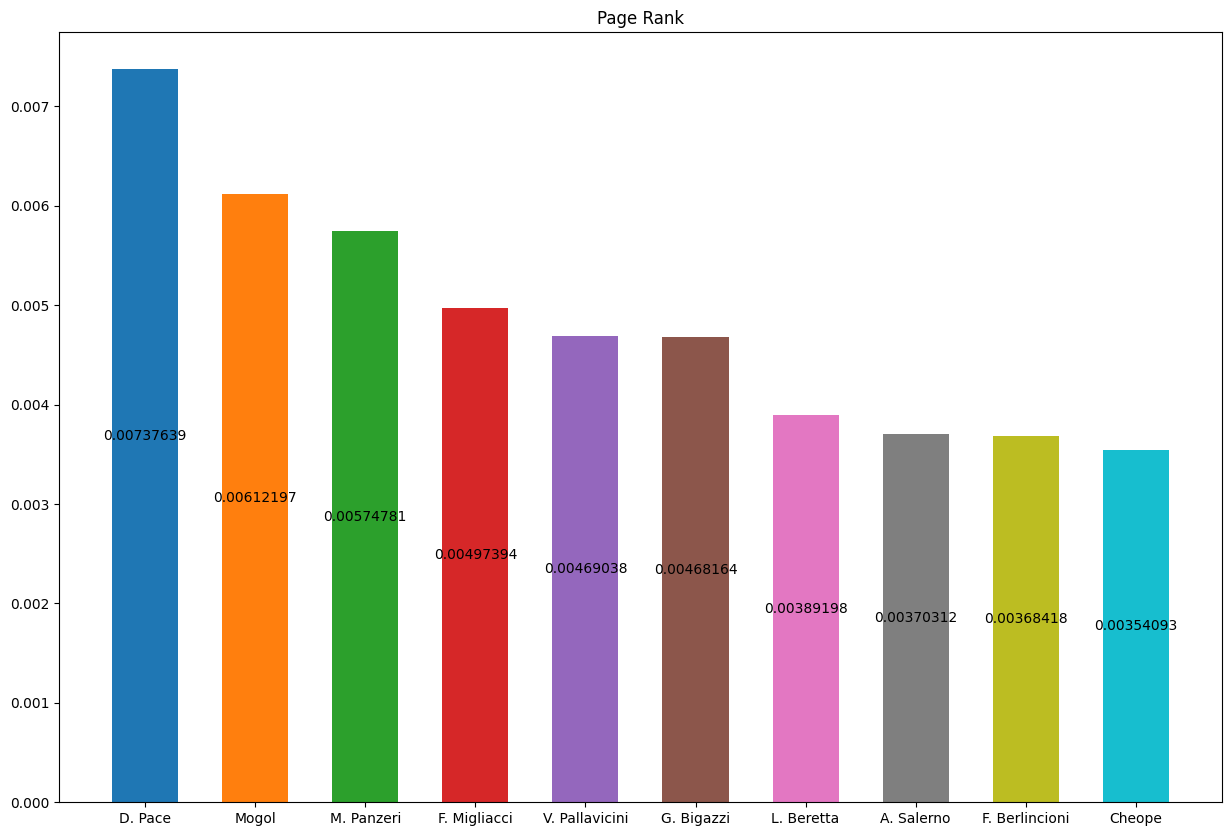

In [55]:
target = local_clustering
title = "Local Clustering Coefficient"

#ONLY CHANGE THINGS ABOVE THIS LINE

to_graph = {k: v for k, v in sorted(target.items(), key=lambda item: item[1], reverse=True)}
to_graph = [[k,v] for k,v in to_graph.items()][:10]
#print bar graph of closeness centrality

species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {v[0]:v[1] for v in to_graph}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(len(to_graph))

for name, value in sex_counts.items():
    p = ax.bar(name, value, width, label=value)
    #bottom += value

    ax.bar_label(p, label_type='center')

ax.set_title(title)
#ax.legend()

plt.show()

In [8]:
# sort by degree centrality
sorted_deg_centrality = sorted(deg_centrality.items(), key=operator.itemgetter(1), reverse=True)
print("sorted degree centrality")
print(sorted_deg_centrality[:5],'\n')

# sort by degree centrality
sorted_pagerank = sorted(nx.pagerank(G, weight="weight").items(), key=operator.itemgetter(1), reverse=True)
print("sorted pagerank")
print(sorted_pagerank[:5],'\n')

sorted degree centrality
[('D. Pace', 0.026422764227642278), ('F. Migliacci', 0.021341463414634148), ('M. Panzeri', 0.020325203252032523), ('Mogol', 0.01829268292682927), ('A. Cogliati', 0.016260162601626018)] 

sorted pagerank
[('D. Pace', 0.007376393122921384), ('Mogol', 0.006121967699725386), ('M. Panzeri', 0.005747805656000637), ('F. Migliacci', 0.004973942278722417), ('V. Pallavicini', 0.00469037818656619)] 



In [9]:
newfile = open("ce.txt","w")
newfile.write('\n'.join([str(b["s"]) + " | " + str(b["d"]) + " | " + str(b["tracks"]) for a in result for b in a])) 
newfile.close()

newfile2 = open("deg_centrality.csv","w")
newfile2.write("Writer,Label,Degree Centrality\n")
newfile2.write('\n'.join([str(a) + ","+ str(a) +"," + str(deg_centrality[a]) for a in deg_centrality]))
newfile2.close()

nx.write_gexf(gMogol, "mogol.gexf")
